In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/drive/MyDrive/books_scraped.csv')
df

,Title,Book_category,Star_rating,Price,Stock,Quantity
0,A Light in the Attic,Poetry,Three,51.77,In stock,22
1,Tipping the Velvet,Historical Fiction,One,53.74,In stock,20
2,Soumission,Fiction,One,50.10,In stock,20
3,Sharp Objects,Mystery,Four,47.82,In stock,20
4,Sapiens: A Brief History of Humankind,History,Five,54.23,In stock,20
...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,One,55.53,In stock,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,Four,57.06,In stock,1
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,Five,16.97,In stock,1
998,1st to Die (Women's Murder Club #1),Mystery,One,53.98,In stock,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          1000 non-null   object 
 1   Book_category  1000 non-null   object 
 2   Star_rating    1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Stock          1000 non-null   object 
 5   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.corr(numeric_only=True)

,Price,Quantity
Price,1.000000,-0.010914
Quantity,-0.010914,1.000000


In [6]:
df.isna().sum()

,0
Title,0
Book_category,0
Star_rating,0
Price,0
Stock,0
Quantity,0


In [7]:
for i in df:
  if df[i].dtypes=="object":
    print(df[i].value_counts())
    print('~~~~~~~~~~~~~~~~~~~~~~')

Title
The Star-Touched Queen                                        2
A Light in the Attic                                          1
Harry Potter and the Prisoner of Azkaban (Harry Potter #3)    1
Some Women                                                    1
Shopaholic Ties the Knot (Shopaholic #3)                      1
                                                             ..
Angels Walking (Angels Walking #1)                            1
Angels & Demons (Robert Langdon #1)                           1
All the Light We Cannot See                                   1
Adulthood Is a Myth: A "Sarah's Scribbles" Collection         1
1,000 Places to See Before You Die                            1
Name: count, Length: 999, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~
Book_category
Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Myster

feature enginering


In [8]:
def price_catogery(Price):
  if Price<20:
    return 'Budget'
  elif Price>=20 and Price<40:
    return 'Medium'
  else:
    return "Premium"

In [9]:
df['price_catogery']=df['Price'].apply(func=price_catogery) #create a new column named price_catogery based on the price column
df

,Title,Book_category,Star_rating,Price,Stock,Quantity,price_catogery
0,A Light in the Attic,Poetry,Three,51.77,In stock,22,Premium
1,Tipping the Velvet,Historical Fiction,One,53.74,In stock,20,Premium
2,Soumission,Fiction,One,50.10,In stock,20,Premium
3,Sharp Objects,Mystery,Four,47.82,In stock,20,Premium
4,Sapiens: A Brief History of Humankind,History,Five,54.23,In stock,20,Premium
...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,One,55.53,In stock,1,Premium
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,Four,57.06,In stock,1,Premium
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,Five,16.97,In stock,1,Budget
998,1st to Die (Women's Murder Club #1),Mystery,One,53.98,In stock,1,Premium


In [10]:
df[df['Star_rating'].str.startswith('Five')] #196 BOOKS FIVE STARS

,Title,Book_category,Star_rating,Price,Stock,Quantity,price_catogery
4,Sapiens: A Brief History of Humankind,History,Five,54.23,In stock,20,Premium
12,Set Me Free,Young Adult,Five,17.46,In stock,19,Budget
13,Scott Pilgrim's Precious Little Life (Scott Pi...,Sequential Art,Five,52.29,In stock,19,Premium
14,Rip it Up and Start Again,Music,Five,35.02,In stock,19,Medium
23,Chase Me (Paris Nights #2),Romance,Five,25.27,In stock,19,Medium
...,...,...,...,...,...,...,...
985,Deep Under (Walker Security #1),Romance,Five,47.09,In stock,1,Premium
989,Bright Lines,Fiction,Five,39.07,In stock,1,Medium
993,"Bleach, Vol. 1: Strawberry and the Soul Reaper...",Sequential Art,Five,34.65,In stock,1,Medium
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,Five,16.97,In stock,1,Budget


outliers

In [11]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
iqr=q3-q1
min_range=q1-1.5*iqr
max_range=q3+1.5*iqr
min_range  #-15.9174999
max_range  #85.48249999

85.48249999999999

<function matplotlib.pyplot.show(close=None, block=None)>

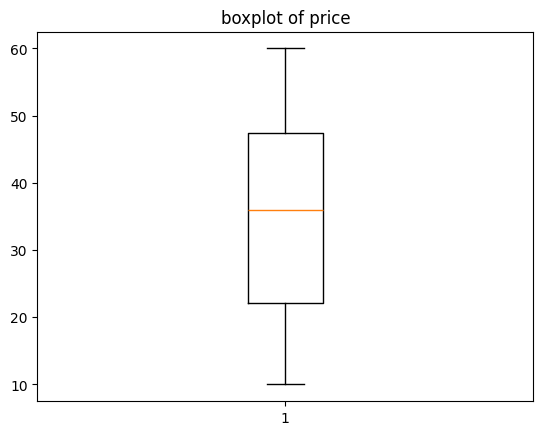

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(df['Price'])
plt.title ('boxplot of price')
plt.show                        #there is no outliers in this dataset

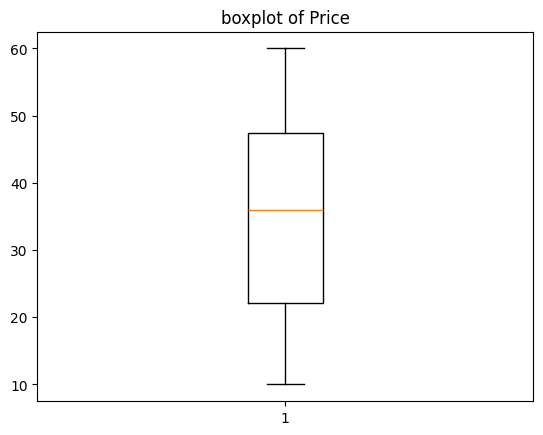

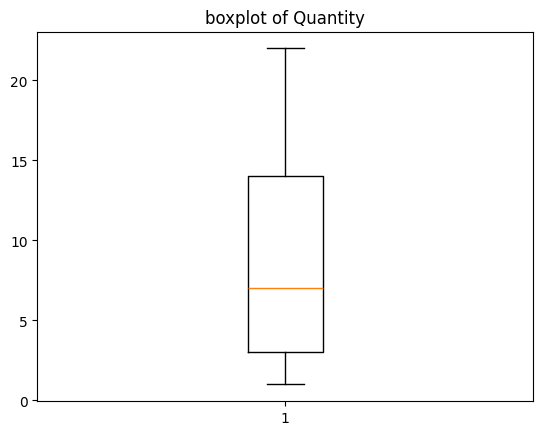

In [13]:
for col in df:
  if df[col].dtype=='int' or df[col].dtype=='float':
    plt.boxplot(df[col])
    plt.title(f'boxplot of {col}')
    plt.show()

univeriate analysis

In [14]:
for col in df:
  if df[col].dtype=='int' or df[col].dtype=='float':
    print(col)
    print('______________')
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Minimum: {df[col].min()}")
    print(f"Maximum: {df[col].max()}")
    print(f"Standard devition: {df[col].std()}")
    print('*************************************')
    print()
    print()                                                #price maximum==59.99,minimum==10.0
                                                          # quantity maximum==22,minimum==1

Price
______________
Mean: 35.07035
Median: 35.980000000000004
Minimum: 10.0
Maximum: 59.99
Standard devition: 14.446689669952772
*************************************


Quantity
______________
Mean: 8.585
Median: 7.0
Minimum: 1
Maximum: 22
Standard devition: 5.654621981153932
*************************************




In [ ]:
#univeriate analysis
import seaborn as sns
sns.countplot(x=df['Quantity'])
plt.show()

hist plot

In [ ]:
plt.hist(df['Price'],bins=4)
plt.title
plt.xlabel('Price',color='red')
plt.ylabel('count')
plt.show

In [ ]:
for i in df:
  if df[i].dtype=='int' or df[i].dtype=='float':
    plt.hist(df[i],bins=4)
    plt.title(f'Histogram of {i}')
    plt.xlabel(i,color='red')
    plt.ylabel('count')
    plt.show()

categorical column

In [ ]:
for col in df :
  if df [col].dtype=='object':
    print (df[col].value_counts())
    print(f'Number of unique categories{df[col].nunique()}')
    print('_______________________________________')                #bookk category 152 default,110 nonfictions
                                                                    #price category premium books 403,medium books 401 and the budget book 196
                                                                    #star rating category One=226,Three=203,Five=196,Two=196,Four=179



In [ ]:
plt.bar (x=df['Star_rating'].value_counts().index,height=df['Star_rating'].value_counts())
plt.xlabel('Star_rating')
plt.ylabel('Count')
plt.title('Count plot of Star_rating ')
plt.show()

In [ ]:
for i in df:
  if df[i].dtype=='object' and i!='Title':
    plt.bar(x=df[i].value_counts().index,height=df[i].value_counts())
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.title(f"count plot of {i} ")
    plt.show()

biveriate analysis


In [ ]:
import seaborn as sns
var1=df.corr(numeric_only=True)
plt.title('Heatmap')
sns.heatmap(var1,annot=True)
plt.show()

In [ ]:
plt.scatter(x=df['Price'],y=df['Quantity'])
plt.title('scatter plots of Price and Quantity ')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

In [ ]:
df.sort_values(by='Price',ascending=False)

In [ ]:
obj_col=[]
num_col=[]
for i in df:
  if df[i].dtype=='object':
    obj_col.append(i)
  else:
    num_col.append(i)

In [ ]:
print(obj_col)
print(num_col)

In [ ]:
for obj in obj_col:
  for num in num_col:
    print(f'{obj} and {num} Analysis')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print(df[[obj,num]].groupby(obj).agg(['mean','median','min','max','std','count']))
    print('_________________________________________________________________')

In [ ]:
#Line plot
#time series analysis
var1=df[['Quantity','Price']].groupby ('Quantity').mean()
plt.plot(var1.index,var1)
plt.title(' Quantity vs average Price  ')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

In [ ]:
plt.pie(df['Star_rating'].value_counts(),labels=df['Star_rating'].value_counts().index,autopct='%1.0f%%')
plt.title('pie plot of Star_rating categorical count')
plt.show()

In [ ]:
plt.pie(df.groupby('Star_rating')['Price'].mean(),labels=df.groupby('Star_rating')['Price'].mean().index,autopct='%1.1f%%')
plt.show()

In [ ]:
plt.pie(df.groupby('Star_rating')['Quantity'].mean(),labels=df.groupby('Star_rating')['Quantity'].mean().index,autopct='%1.1f%%')
plt.show()

In [ ]:
plt.bar(x=df.groupby('Star_rating')['Price'].mean().index,height=df.groupby('Star_rating')['Price'].mean())
plt.show()

In [ ]:
plt.bar(x=df.groupby('Star_rating')['Quantity'].mean().index,height=df.groupby('Star_rating')['Quantity'].mean())
plt.show()

In [ ]:
sns.swarmplot

In [ ]:
df